In [1]:
#Import liberies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

# Importing and merging the data from steps and survey 

In [2]:
#import data sets
step_data = pd.read_csv("steps.csv", sep=";")
survey_data = pd.read_csv('survey.csv')

In [3]:
#Merge datasets
df = survey_data.merge(step_data, on = "id")
df.head()

,id,city,gender,age,hh_size,education_1,height,weight,20-6-2013,21-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,Bachelor,180.0,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,NaN,11428.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,Bachelor,178.0,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,Bachelor,167.0,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The relation of meansteps per participant with at least 2 other quantitative variables# The relation of meansteps per participant with at least 2 other quantitative variables

In [4]:
#selection of the colomns with the steps per day
steps = df.loc[:, '20-6-2013':'13-5-2014']

#Calculating the mean steps per participant
steps["mean"] =  steps.mean(axis = 1, skipna = True)

#store the mean colomn from the new creating dataframe in the existing dataframe
df["mean"] = steps["mean"]
df.head()

,id,city,gender,age,hh_size,education_1,height,weight,20-6-2013,21-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,Bachelor,180.0,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,NaN,11428.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,Bachelor,178.0,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,Bachelor,167.0,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [5]:
#Calculating the correlation between mean height and weight
corr = df[['mean', 'height', 'weight']].corr()
corr

,mean,height,weight
mean,1.000000,-0.069667,-0.016293
height,-0.069667,1.000000,0.265138
weight,-0.016293,0.265138,1.000000


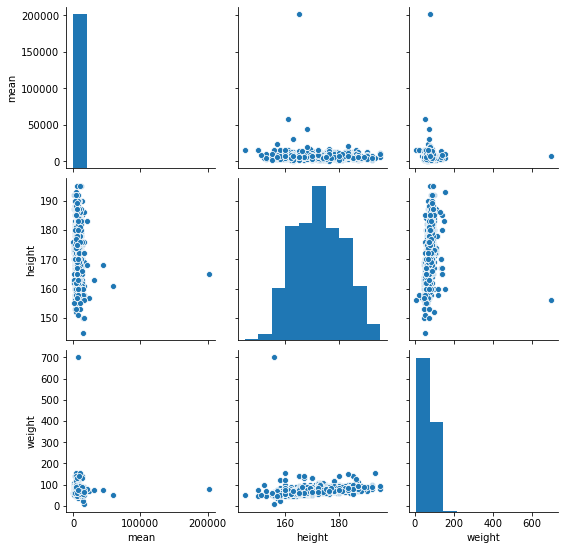

In [6]:
#Correlation matrix including all 3 variables
df_sel = df[['mean', 'height', 'weight']] 
sns.pairplot(df_sel)
plt.show()

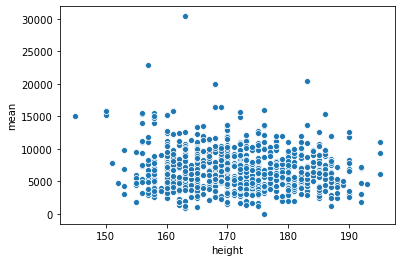

In [7]:
#remove the outliers in the mean colomn with the funcion above_40000
#If this value is above fill in NaN
def above_40000(x):
    if(x > 40000):
        return float("NaN")
    else:
        return x

#relation between mean steps per participant and height in a scatter plot    
df["mean"] = df["mean"].apply(above_40000)
sns.scatterplot(data=df, x="height", y="mean")

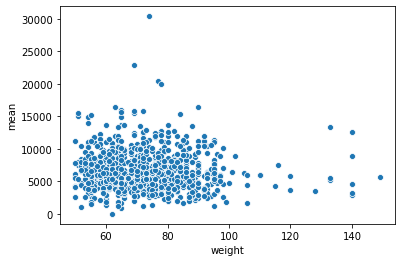

In [8]:
def above_150(x):
    if(x > 150):
        return float("NaN")
    else:
        return x
    
def below_50(x):
    if(x < 50):
        return float("NaN")
    else:
        return x

#remove mean above 40000 and weight above 150 kilos and plot this in a scatterplot


df["weight"] = df["weight"].apply(above_150)
df["weight"] = df["weight"].apply(below_50)
sns.scatterplot(data=df, x="weight", y="mean")

In [9]:
#Pearson correlatie between mean, height and weight
pearson_corr = df[['mean', 'height', 'weight']].corr(method='pearson')
pearson_corr

,mean,height,weight
mean,1.000000,-0.091415,-0.057655
height,-0.091415,1.000000,0.489445
weight,-0.057655,0.489445,1.000000


Between height and weight you can see a moderate positive linear correlation. The other collelations are linear but weak. All the correlations with the mean are negative. 

# Relation between means steps per gender 

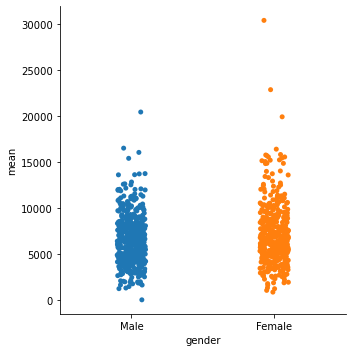

In [10]:
#relation between gender and mean scatterplot
df["mean"] = df["mean"].apply(above_40000)
tips = sns.load_dataset("tips")
sns.catplot(x="gender", y="mean", data=df)

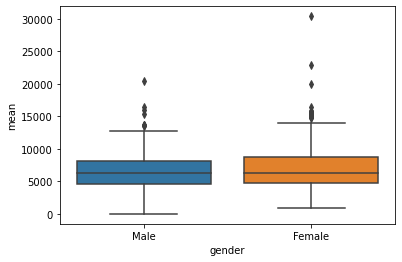

In [12]:
#relation between gender and mean boxplot
df["mean"] = df["mean"].apply(above_40000)
ax = sns.boxplot(x="gender", y="mean", data=df)

If you have a look at both graphs you can see that the mean steps per participant for the female users is more spread. And there are more outliers up. 

# Relation between two quantitative variables

In [13]:
#Calculate percentage of participants per age group per gender
ct = pd.crosstab(df['age'], df['gender']).apply(lambda r: r/r.sum()*100, axis=1)
ct

gender,Female,Male
age,,
25-34,42.957746,57.042254
35-44,50.561798,49.438202
45-54,55.102041,44.897959
55-64,47.826087,52.173913
65+,14.285714,85.714286
<25,46.400000,53.600000


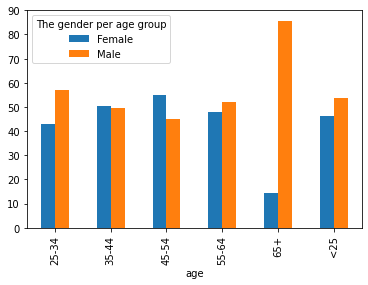

In [15]:
#plot crostab in bar graph
ct.plot.bar(stacked=False)
plt.legend(title='The gender per age group')
plt.show()


in general, the ratio of participants by age group is very fairly divided by gender. Only among the 65+ is a clear difference to be seen that almost only men participated. They represent almost 86% of all participants in this age group.